In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("../Dataset/gurgaon_properties_outlier_treated.csv")

In [4]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,0,flat,ardee city,sector 52,1.55,7381.0,2100.0,Built Up area: 2100 (195.1 sq.m.)Carpet area: ...,4,4,3,1.0,NaN,Moderately Old,NaN,2100.0,1600.0,0,0,0,0,0,1,0,525.000000
1,1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,10.0,NaN,Relatively New,NaN,NaN,520.0,0,0,0,0,0,1,15,260.000000
2,3,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3,5,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,0,1,0,0,0,1,72,1064.666667
3,4,flat,parsvnath exotica,sector 53,4.80,16580.0,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up...,3,4,3+,8.0,North-East,Relatively New,2895.0,2500.0,2200.0,0,1,0,1,1,2,174,965.000000
4,5,flat,emaar palm gardens,sector 83,1.76,9263.0,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,3,6.0,North-West,Relatively New,1900.0,1500.0,1240.0,0,1,0,0,0,2,165,633.333333


In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area          1968
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

Observation
* built_up_area has highest missing value, so we will impute that column first.
* Approach is check super built up area and carpet area and find its ration and fill it with that ratio. so we will only keep built up area 

## Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

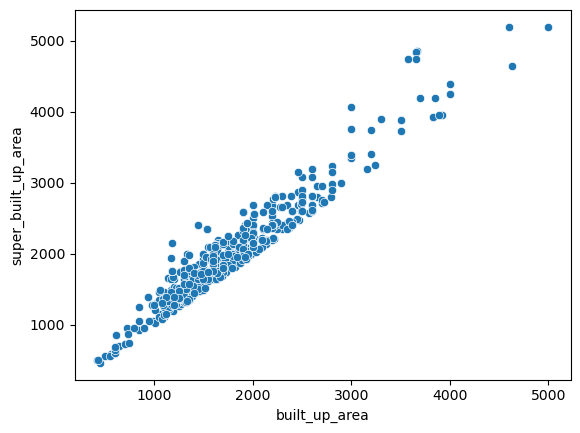

In [8]:
sns.scatterplot(x = df['built_up_area'],y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

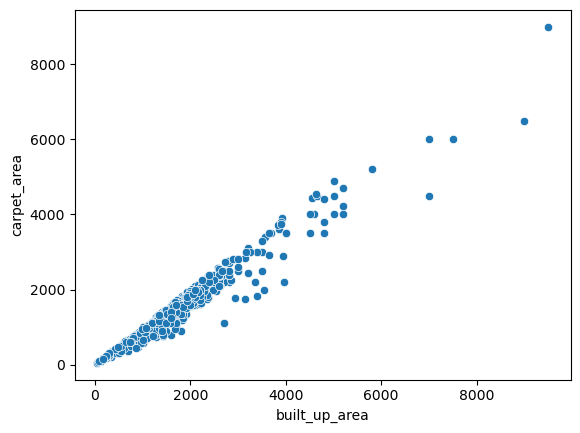

In [9]:
sns.scatterplot(x = df['built_up_area'],y = df['carpet_area'])

In [22]:
carpet_to_built_up_ratio = round((df['carpet_area'].dropna()/df['built_up_area'].dropna()).median(),1)
print(carpet_to_built_up_ratio)

0.9


In [23]:
super_to_built_up_ratio = round((df['super_built_up_area'].dropna()/df['built_up_area'].dropna()).median(),2)
print(super_to_built_up_ratio)

1.11


In [24]:
# only built up area is null
built_null_df = df[((~df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (~df['carpet_area'].isnull()))]

In [25]:
built_null_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
18,flat,chd avenue,sector 71,1.15,6527.0,1762.0,Super Built up area 1762(163.7 sq.m.)Carpet ar...,3,3,2,15.0,East,Moderately Old,1762.0,NaN,1339.0,0,1,0,0,0,2,66,587.333333
29,flat,emaar gurgaon greens,sector 102,1.38,13490.0,1023.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,6.0,North-East,Relatively New,1650.0,NaN,1023.0,0,1,0,0,0,2,128,341.000000
30,flat,puri the aravallis,sector 61,3.87,17200.0,2250.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,4,3+,21.0,East,Under Construction,2250.0,NaN,1250.0,0,1,0,0,0,1,58,750.000000
43,flat,ireo victory valley,sector 67,2.87,11904.0,2411.0,Super Built up area 2411(223.99 sq.m.)Carpet a...,3,3,3+,16.0,North-West,Relatively New,2411.0,NaN,1808.0,0,1,0,0,0,2,174,803.666667
44,flat,alpha corp gurgaonone,sector 84,1.52,7904.0,1923.0,Super Built up area 1923(178.65 sq.m.)Carpet a...,3,4,3,15.0,South,Relatively New,1923.0,NaN,1500.0,0,1,0,0,0,1,92,641.000000


In [27]:
built_null_df['built_up_area'] = round(
    ((built_null_df['super_built_up_area']/super_to_built_up_ratio) + (built_null_df['carpet_area']/carpet_to_built_up_ratio))/2,2)

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_3096\1733987498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  built_null_df['built_up_area'] = round(


In [28]:
built_null_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
18,flat,chd avenue,sector 71,1.15,6527.0,1762.0,Super Built up area 1762(163.7 sq.m.)Carpet ar...,3,3,2,15.0,East,Moderately Old,1762.0,1537.58,1339.0,0,1,0,0,0,2,66,587.333333
29,flat,emaar gurgaon greens,sector 102,1.38,13490.0,1023.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,6.0,North-East,Relatively New,1650.0,1311.58,1023.0,0,1,0,0,0,2,128,341.000000
30,flat,puri the aravallis,sector 61,3.87,17200.0,2250.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,4,3+,21.0,East,Under Construction,2250.0,1707.96,1250.0,0,1,0,0,0,1,58,750.000000
43,flat,ireo victory valley,sector 67,2.87,11904.0,2411.0,Super Built up area 2411(223.99 sq.m.)Carpet a...,3,3,3+,16.0,North-West,Relatively New,2411.0,2090.48,1808.0,0,1,0,0,0,2,174,803.666667
44,flat,alpha corp gurgaonone,sector 84,1.52,7904.0,1923.0,Super Built up area 1923(178.65 sq.m.)Carpet a...,3,4,3,15.0,South,Relatively New,1923.0,1699.55,1500.0,0,1,0,0,0,1,92,641.000000


In [29]:
df.update(built_null_df)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area          1548
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [36]:
# both built up area and carpet area is null and super built up is not null
b_c_null_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [37]:
b_c_null_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,ramsons kshitij,sector 95,0.45,4592.0,980.0,Super Built up area 980(91.04 sq.m.),2,2,1,2.0,NaN,Relatively New,980.0,NaN,NaN,1,0,0,0,0,1,89,490.0
10,flat,dlf the ultima,sector 81,3.45,12013.0,2872.0,Super Built up area 2872(266.82 sq.m.),4,4,3+,10.0,East,New Property,2872.0,NaN,NaN,0,1,0,0,0,0,165,718.0
11,flat,ss the leaf,sector 85,1.05,6402.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,11.0,North-East,Relatively New,1640.0,NaN,NaN,0,0,0,0,0,1,44,820.0
16,flat,shapoorji pallonji joyville gurugram,sector 102,1.10,12182.0,903.0,Super Built up area 903(83.89 sq.m.),2,2,1,8.0,NaN,Under Construction,903.0,NaN,NaN,0,0,0,0,0,1,105,451.5
17,flat,godrej,sector 79,1.29,8206.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,4.0,NaN,New Property,1572.0,NaN,NaN,0,0,0,0,0,1,0,786.0


In [38]:
b_c_null_df['built_up_area'] = round(b_c_null_df['super_built_up_area']/super_to_built_up_ratio,2)

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_3096\3605327746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_c_null_df['built_up_area'] = round(b_c_null_df['super_built_up_area']/super_to_built_up_ratio,2)


In [39]:
b_c_null_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,ramsons kshitij,sector 95,0.45,4592.0,980.0,Super Built up area 980(91.04 sq.m.),2,2,1,2.0,NaN,Relatively New,980.0,882.88,NaN,1,0,0,0,0,1,89,490.0
10,flat,dlf the ultima,sector 81,3.45,12013.0,2872.0,Super Built up area 2872(266.82 sq.m.),4,4,3+,10.0,East,New Property,2872.0,2587.39,NaN,0,1,0,0,0,0,165,718.0
11,flat,ss the leaf,sector 85,1.05,6402.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,11.0,North-East,Relatively New,1640.0,1477.48,NaN,0,0,0,0,0,1,44,820.0
16,flat,shapoorji pallonji joyville gurugram,sector 102,1.10,12182.0,903.0,Super Built up area 903(83.89 sq.m.),2,2,1,8.0,NaN,Under Construction,903.0,813.51,NaN,0,0,0,0,0,1,105,451.5
17,flat,godrej,sector 79,1.29,8206.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,4.0,NaN,New Property,1572.0,1416.22,NaN,0,0,0,0,0,1,0,786.0


In [40]:
df.update(b_c_null_df)

In [41]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area           676
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [42]:
# both super built up and built up is null and carpet is not null
s_b_null_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (~df['carpet_area'].isnull())]

In [43]:
s_b_null_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,10.0,NaN,Relatively New,NaN,NaN,520.0,0,0,0,0,0,1,15,260.00
6,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9001.0,Carpet area: 9000 (836.13 sq.m.),4,3,3,7.0,South-East,Moderately Old,NaN,NaN,9000.0,0,1,0,0,0,1,35,2250.25
7,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4,4,3,9.0,South-East,Moderately Old,NaN,NaN,10000.0,0,1,0,0,0,1,35,2500.00
15,flat,signature global park,sohna road,0.56,6813.0,822.0,Carpet area: 822 (76.37 sq.m.),2,2,3,3.0,South,New Property,NaN,NaN,822.0,0,0,0,0,0,1,81,411.00
22,flat,m3m heights,sector 65,2.25,13612.0,1653.0,Carpet area: 1433 (133.13 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,NaN,1433.0,0,0,0,0,0,1,48,826.50


In [49]:
s_b_null_df['built_up_area'] = round((s_b_null_df['carpet_area']/carpet_to_built_up_ratio),2)

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_3096\4275476544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_b_null_df['built_up_area'] = round((s_b_null_df['carpet_area']/carpet_to_built_up_ratio),2)


In [50]:
s_b_null_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,10.0,NaN,Relatively New,NaN,577.78,520.0,0,0,0,0,0,1,15,260.00
6,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9001.0,Carpet area: 9000 (836.13 sq.m.),4,3,3,7.0,South-East,Moderately Old,NaN,10000.00,9000.0,0,1,0,0,0,1,35,2250.25
7,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4,4,3,9.0,South-East,Moderately Old,NaN,11111.11,10000.0,0,1,0,0,0,1,35,2500.00
15,flat,signature global park,sohna road,0.56,6813.0,822.0,Carpet area: 822 (76.37 sq.m.),2,2,3,3.0,South,New Property,NaN,913.33,822.0,0,0,0,0,0,1,81,411.00
22,flat,m3m heights,sector 65,2.25,13612.0,1653.0,Carpet area: 1433 (133.13 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1592.22,1433.0,0,0,0,0,0,1,48,826.50


In [51]:
df.update(s_b_null_df)

In [52]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area             0
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

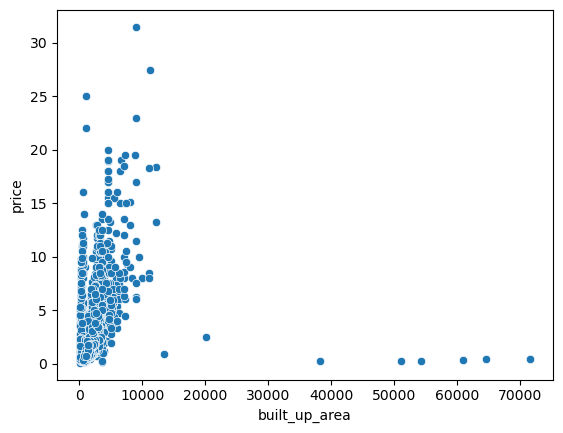

In [53]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

Observation
* All the filling has been done and the built up area to price ration should be linear but no idea why i am getting this

In [54]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df.sample(5)

,price,area,built_up_area
2369,2.6,1711.0,1541.44
46,25.0,1035.0,1000.00
3250,2.6,4986.0,615.56
1972,3.5,1440.0,1440.00
590,3.5,1449.0,1449.00


In [55]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [56]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

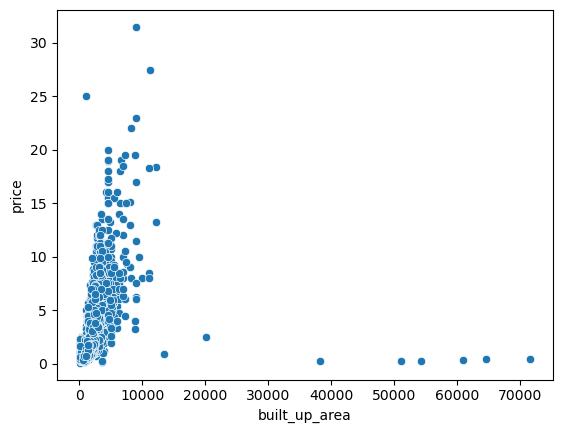

In [57]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

Observation
* Filled the built up area 

In [58]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [59]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ardee city,sector 52,1.55,7381.0,4,4,3,1.0,NaN,Moderately Old,2100.00,0,0,0,0,0,1,0
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,2,2,1,10.0,NaN,Relatively New,577.78,0,0,0,0,0,1,15
2,flat,experion windchants,sector 112,3.65,11428.0,3,5,2,3.0,South-West,Relatively New,2800.00,0,1,0,0,0,1,72
3,flat,parsvnath exotica,sector 53,4.80,16580.0,3,4,3+,8.0,North-East,Relatively New,2500.00,0,1,0,1,1,2,174
4,flat,emaar palm gardens,sector 83,1.76,9263.0,3,3,3,6.0,North-West,Relatively New,1500.00,0,1,0,0,0,2,165


In [60]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## facing

In [69]:
1009/df.shape[0]

0.2838255977496484

<Axes: ylabel='count'>

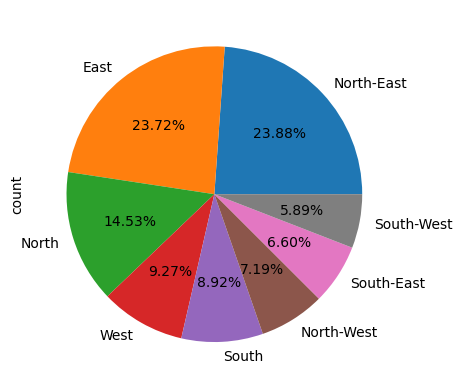

In [61]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [62]:
df.drop(columns=['facing'],inplace=True)

In [63]:
df.isnull().sum()

property_type       0
society             1
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum           17
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

Observation
* Facing has lot of missing value.
* from pie chart i am not get how to fill the null value there might be a relation but don't know.
* finally i am droping that column


## floornum

In [64]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
80,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,Under Construction,1758.0,0,0,0,0,0,1,0
344,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,Moderately Old,2800.0,0,1,0,1,0,2,130
858,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,Old Property,3762.0,0,1,0,0,0,1,59
899,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,Under Construction,1242.0,0,0,0,0,0,1,0
1107,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,Relatively New,5200.0,0,1,1,1,0,2,114
1151,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
1484,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,Moderately Old,585.0,0,0,0,0,0,1,0
1508,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,Old Property,3771.0,0,0,0,0,0,1,28
1558,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,Moderately Old,3240.0,1,1,1,1,0,1,0
1574,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,Relatively New,2844.0,1,1,1,1,0,0,0


In [65]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [66]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_3096\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [67]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

Observation
* in floor num all are hosue only 2 are flat so replacing the null value with the median of house

## society

In [72]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2439,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [73]:
df.drop(index=[2439],inplace=True)

## agePossession

Observation
* age posession has lot of undefined value and need to fill it
* we will go to secto and proerty type and check what are matching with undefined and will fill it with mode value of those matched result.
* By checking both still there was undefined because the combination of sector and proeprty type gives null so we pick solo columns and filled the null values.

In [70]:
df['agePossession'].value_counts()

agePossession
Relatively New        1608
New Property           556
Moderately Old         544
Undefined              291
Old Property           291
Under Construction     265
Name: count, dtype: int64

In [74]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,flat,umang monsoon breeze,sector 78,0.70,5719.0,2,2,2,5.0,Undefined,1224.00,0,0,0,0,0,1,0
13,flat,sobha city,sector 108,3.95,16859.0,4,5,3,25.0,Undefined,2343.00,0,0,0,0,0,1,59
34,flat,aardhya homesh,sector 67a,1.85,8043.0,4,4,0,4.0,Undefined,2555.56,0,0,0,0,0,1,0
50,flat,hcbs sports ville,sohna road,0.38,5067.0,2,2,2,9.0,Undefined,750.00,0,0,0,0,0,1,0
57,flat,sapphire eighty three,sector 83,0.65,9286.0,1,1,0,6.0,Undefined,700.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,house,independent,sector 3 phase 3 extension,1.00,6667.0,1,1,0,1.0,Undefined,1500.00,0,0,0,0,0,1,0
3500,flat,ansal height 86,sector 86,0.80,5882.0,2,2,0,1.0,Undefined,1360.00,0,0,0,0,0,1,0
3509,flat,supertech hues,sector 68,0.93,8611.0,2,2,2,11.0,Undefined,1200.00,0,0,0,0,0,1,0
3518,house,independent,sector 14,4.60,20444.0,1,1,0,1.0,Undefined,2250.00,0,0,0,0,0,1,0


In [75]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [76]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [77]:
df['agePossession'].value_counts()

agePossession
Relatively New        1731
New Property           586
Moderately Old         583
Old Property           323
Under Construction     278
Undefined               53
Name: count, dtype: int64

In [78]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [79]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [80]:
df['agePossession'].value_counts()

agePossession
Relatively New        1740
Moderately Old         590
New Property           587
Old Property           326
Under Construction     278
Undefined               33
Name: count, dtype: int64

In [81]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [82]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)


In [83]:
df['agePossession'].value_counts()

agePossession
Relatively New        1742
Moderately Old         621
New Property           587
Old Property           326
Under Construction     278
Name: count, dtype: int64

In [84]:
df.shape

(3554, 18)

In [86]:
df.to_csv('../Dataset/gurgaon_properties_missing_value_imputation.csv',index=False)